    NeuronType  mean_IBI    cov_IBI  Number_Bursts  mean_Spike_per_Burst   
66          WT  1.377419  43.537125            218           3504.399083  \
67          WT  2.068056  61.419442            145           2790.289655   
68         HET  2.114184  55.795678            142           3016.732394   
69         HET  1.341256  44.114322            224           2803.700893   
70         HET  1.871250  46.539447            161           3299.981366   
71         HET  1.661798  50.431989            179           2699.061453   
72         HET  1.551295  50.775149            194           3319.056701   
73         HET  1.713793  46.432129            175           3342.811429   
74         HET  2.086620  55.168019            143           2578.307692   
75         HET  1.313656  42.765446            228           2680.508772   
76         HET  1.938961  57.082159            155           2767.316129   
113         WT  1.359633  43.286811            219           4992.401826   
114         

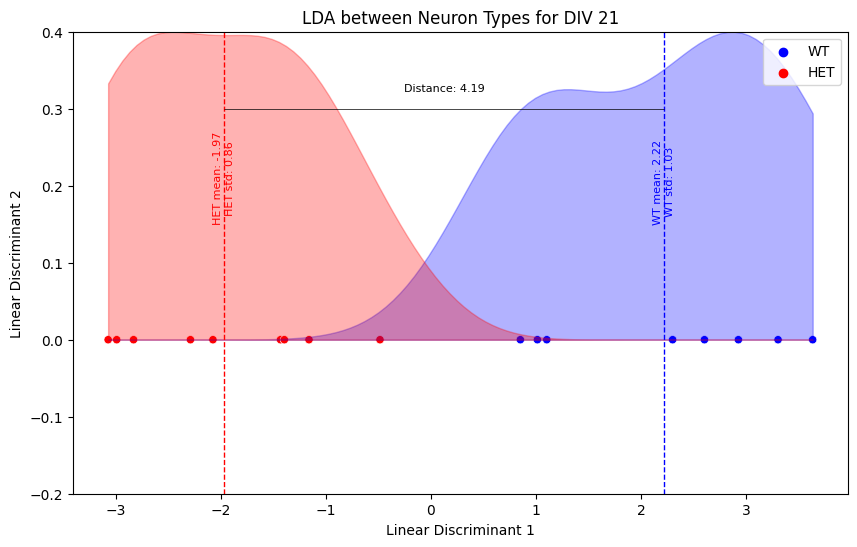

In [1]:
#categorical variable as Neurontype. Here the number of Discriminants = Number of classes - 1 (Here only 3 HET,HOM and WT ). Des features which is the rest of the columns not dropped vs targert variables (y) (Here the Neuron types)
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
# Load the dataset
file_path = '/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/Primary Neurons/adnp_report_June2024/therapy_combined.csv'
df = pd.read_csv(file_path)

# Filter the DataFrame for Run_ID 59 and 57
filtered_df = df[df['DIV'].isin(['21'])]

#print(filtered_df)
# Remove specified columns
columns_to_remove = ['cov_BurstDuration', 'mean_Burst_Peak_Abs', 'cov_Burst_Peak_Abs',
                     'mean_Burst_Peak', 'cov_Burst_Peak', 'Time', 'Chip_ID', 'Well', 'Run_ID', 'DIV']
filtered_df = filtered_df.drop(columns=columns_to_remove)
#print(filtered_df)

# Drop rows with any NaN values
filtered_df = filtered_df.dropna()
print(filtered_df)

# Separate features and target variable, considering only 'NeuronType' as the categorical variable
X = filtered_df.drop(columns=['NeuronType'])
y = filtered_df['NeuronType']

# Apply LDA
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for LDA results
lda_df = pd.DataFrame(X_lda, columns=['LD1'])
lda_df['NeuronType'] = y.values

# Plot the LDA results
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='LD1', y=[0]*len(lda_df), hue='NeuronType', data=lda_df, palette={'HET': 'red', 'HOM': 'green', 'WT': 'blue'})

# # # Plot Gaussian distributions (density plot) for HET
# sns.kdeplot(lda_df[lda_df['NeuronType'] == 'HET']['LD1'], color='red', shade=True, alpha=0.3, legend=False)

# # Plot Gaussian distributions (density plot) for WT
# sns.kdeplot(lda_df[lda_df['NeuronType'] == 'WT']['LD1'], color='blue', shade=True, alpha=0.3, legend=False)

# Calculate the kernel density estimate
wt_kde = stats.gaussian_kde(lda_df[lda_df['NeuronType'] == 'WT']['LD1'])
het_kde = stats.gaussian_kde(lda_df[lda_df['NeuronType'] == 'HET']['LD1'])

# Generate x values for plotting
x_range = np.linspace(lda_df['LD1'].min(), lda_df['LD1'].max(), 100)

# Calculate y values and normalize them to the range [0, 0.4]
wt_y = wt_kde(x_range)
het_y = het_kde(x_range)
wt_y_normalized = wt_y / wt_y.max() * 0.4
het_y_normalized = het_y / het_y.max() * 0.4

# Plot the normalized density curves
ax.fill_between(x_range, wt_y_normalized, alpha=0.3, color='blue')
ax.fill_between(x_range, het_y_normalized, alpha=0.3, color='red')
# Calculate means and standard deviations
wt_data = lda_df[lda_df['NeuronType'] == 'WT']['LD1']
het_data =lda_df[lda_df['NeuronType'] == 'HET']['LD1']

mean_wt = np.mean(wt_data)
mean_het = np.mean(het_data)
std_wt = np.std(wt_data)
std_het = np.std(het_data)

# Plot vertical lines for means and add text annotations
ax.axvline(mean_wt, color='blue', linestyle='--', linewidth=1)
ax.axvline(mean_het, color='red', linestyle='--', linewidth=1)

ax.text(mean_wt, 0.15, f'WT mean: {mean_wt:.2f}\nWT std: {std_wt:.2f}', 
        color='blue', ha='center', va='bottom', fontsize=8, rotation=90)
ax.text(mean_het, 0.15, f'HET mean: {mean_het:.2f}\nHET std: {std_het:.2f}', 
        color='red', ha='center', va='bottom', fontsize=8, rotation=90)

distance = mean_wt - mean_het

# Plot horizontal line between the two means and add distance text
ax.hlines(0.3, mean_het, mean_wt, colors='black', linestyles='-', linewidth=0.5)
ax.text((mean_wt + mean_het) / 2, 0.32, f'Distance: {distance:.2f}', 
        color='black', ha='center', va='bottom', fontsize=8)

ax.set_title(f'LDA between Neuron Types for DIV 21')
ax.set_xlabel('Linear Discriminant 1')
ax.set_ylabel('Linear Discriminant 2')
ax.set_ylim([-0.2, 0.4])
ax.legend(loc='best')
#plt.savefig('/home/mmp/Documents/ADNP_JUNE2024/ADNP_combined_2and3/LDA_DIV21_new.png',format='png')
plt.show()
